In [2]:
from src.sentinel_api import get_sentinel_api
from src.constant import GEOJSON_PATH, DOWNLOADED_DATA_PATH, REMOVE_ZIPS
import os

# get api 
api = get_sentinel_api()

In [3]:
from sentinelsat.sentinel import read_geojson, geojson_to_wkt
# load footpring from geojson
footprint = geojson_to_wkt(read_geojson(GEOJSON_PATH))

# search by polygon, time, and Hub query keywords
products_query = api.query(
                    footprint,
                    limit = 1,
                    sensoroperationalmode = 'SM',
                    filename = 'S1A_*',
                    producttype = 'GRD')

os.makedirs(DOWNLOADED_DATA_PATH, exist_ok = True) 
products = api.download_all(products_query, DOWNLOADED_DATA_PATH)
print(products)

(OrderedDict([('16b4401f-1fab-4bba-9443-001fcfd7eb7c', {'id': '16b4401f-1fab-4bba-9443-001fcfd7eb7c', 'title': 'S1A_S6_GRDH_1SDV_20160423T142013_20160423T142037_010949_0106DC_29A9', 'size': 521789690, 'md5': '5100139c31dbc7cbed0179963f82deb5', 'date': datetime.datetime(2016, 4, 23, 14, 20, 13, 282000), 'footprint': 'POLYGON((63.115822 -18.887869,63.857899 -18.709890,64.236748 -20.133677,63.488781 -20.313992,63.115822 -18.887869))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('16b4401f-1fab-4bba-9443-001fcfd7eb7c')/$value", 'Online': True, 'Creation Date': datetime.datetime(2016, 4, 23, 16, 20, 44, 104000), 'Ingestion Date': datetime.datetime(2016, 4, 23, 16, 20, 46, 395000), 'path': './src/data/S1A_S6_GRDH_1SDV_20160423T142013_20160423T142037_010949_0106DC_29A9.zip', 'downloaded_bytes': 0})]), OrderedDict(), set())


In [4]:
file_titles = []
zip_files = []

for product in products:
    for product_id in product:
        file_titles.append(product[product_id]['title'])
        zip_files.append(product[product_id]['path'])

        import zipfile
        archive = zipfile.ZipFile(product[product_id]['path'], 'r')
        archive.extractall(path=DOWNLOADED_DATA_PATH)

for zip_file in zip_files:
    if REMOVE_ZIPS:
        os.remove(zip_file)    

s1a-s6-grd-vh-20160423t142013-20160423t142037-010949-0106dc-002.tiff
/opt/conda/lib/python3.7/site-packages/rasterio/__init__.py:218: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


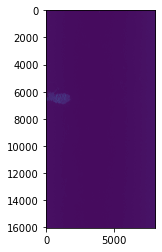

s1a-s6-grd-vv-20160423t142013-20160423t142037-010949-0106dc-001.tiff


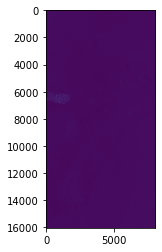

In [5]:
import rasterio
import rasterio.features
import rasterio.warp
import matplotlib.pyplot as plt

for file_title in file_titles:
    measurement_path = os.path.join(DOWNLOADED_DATA_PATH, '{}.SAFE'.format(file_title), 'measurement')
    for tiff_file_name in os.listdir(measurement_path):
        print(tiff_file_name)
        tiff_file_path =  os.path.join(measurement_path, tiff_file_name)   

        with rasterio.open(tiff_file_path, "r") as dataset:
            # Read the dataset's data
            data = dataset.read(1)

            # Visualise the dataset's data
            fig, ax = plt.subplots()
            img = ax.imshow(data.real)
            plt.show()